In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os

In [32]:
DATA_PATH = os.path.join("..", "results", "predictions.csv")
df = pd.read_csv(DATA_PATH)
df

,text,predicted_label,confidence,prob_negative,prob_positive,explanation
0,This movie was fantastic and emotional.,POSITIVE,0.9979,0.0021,0.9979,Detected positive words: ['fantastic']
1,"Worst movie ever, total waste of time.",NEGATIVE,0.9984,0.9984,0.0016,"Detected negative words: ['worst', 'waste']"
2,Good acting but terrible story.,NEGATIVE,0.9386,0.9386,0.0614,Detected negative words: ['terrible']
3,Yeah great… I slept through it.,UNCERTAIN,0.5695,0.5695,0.4305,Detected positive words: ['great']
4,The film had some good moments but overall it ...,NEGATIVE,0.9983,0.9983,0.0017,Detected negative words: ['boring']
5,I loved the cinematography but hated the pacing.,NEGATIVE,0.9969,0.9969,0.0031,Mixed sentiment keywords detected. Positive: [...


In [33]:
df["predicted_label"].value_counts()

predicted_label
NEGATIVE     4
POSITIVE     1
UNCERTAIN    1
Name: count, dtype: int64

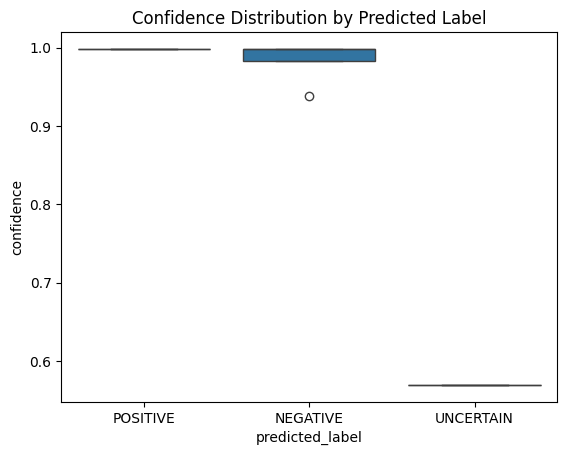

In [34]:
plt.figure()
sns.boxplot(x="predicted_label", y="confidence", data=df)
plt.title("Confidence Distribution by Predicted Label")
plt.show()

In [35]:
df[df["confidence"] > 0.95][["text", "predicted_label", "confidence", "explanation"]]

,text,predicted_label,confidence,explanation
0,This movie was fantastic and emotional.,POSITIVE,0.9979,Detected positive words: ['fantastic']
1,"Worst movie ever, total waste of time.",NEGATIVE,0.9984,"Detected negative words: ['worst', 'waste']"
4,The film had some good moments but overall it ...,NEGATIVE,0.9983,Detected negative words: ['boring']
5,I loved the cinematography but hated the pacing.,NEGATIVE,0.9969,Mixed sentiment keywords detected. Positive: [...


In [36]:
# Manually assigned ground-truth labels for qualitative evaluation
true_labels = [
    "POSITIVE",   # This movie was fantastic and emotional.
    "NEGATIVE",   # Worst movie ever, total waste of time.
    "NEGATIVE",   # Good acting but terrible story.
    "NEGATIVE",   # Yeah great… I slept through it. (sarcasm)
    "NEGATIVE",   # The film had some good moments but overall it was boring.
    "MIXED"       # I loved the cinematography but hated the pacing.
]

df["true_label"] = true_labels
df[["text", "true_label", "predicted_label"]]


,text,true_label,predicted_label
0,This movie was fantastic and emotional.,POSITIVE,POSITIVE
1,"Worst movie ever, total waste of time.",NEGATIVE,NEGATIVE
2,Good acting but terrible story.,NEGATIVE,NEGATIVE
3,Yeah great… I slept through it.,NEGATIVE,UNCERTAIN
4,The film had some good moments but overall it ...,NEGATIVE,NEGATIVE
5,I loved the cinematography but hated the pacing.,MIXED,NEGATIVE


In [37]:
eval_df = df[
    (~df["predicted_label"].isin(["UNCERTAIN"])) &
    (~df["true_label"].isin(["MIXED"]))
]

eval_df[["text", "true_label", "predicted_label"]]


,text,true_label,predicted_label
0,This movie was fantastic and emotional.,POSITIVE,POSITIVE
1,"Worst movie ever, total waste of time.",NEGATIVE,NEGATIVE
2,Good acting but terrible story.,NEGATIVE,NEGATIVE
4,The film had some good moments but overall it ...,NEGATIVE,NEGATIVE


<Figure size 640x480 with 0 Axes>

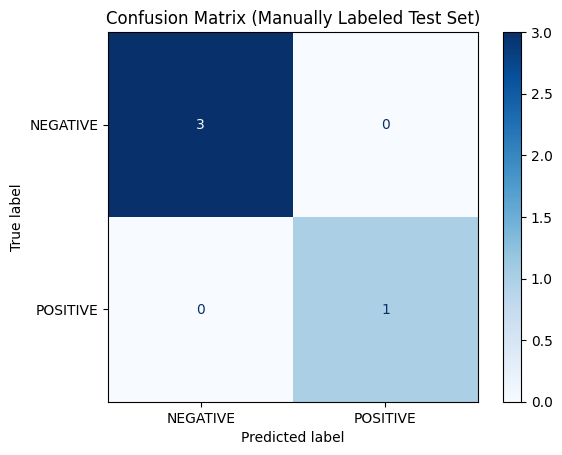

In [38]:
labels = ["NEGATIVE", "POSITIVE"]

cm = confusion_matrix(
    eval_df["true_label"],
    eval_df["predicted_label"],
    labels=labels
)

cm

plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix (Manually Labeled Test Set)")
plt.show()
